In [775]:
print("hello world")

hello world


# Logistic regression 
### https://jovian.ai/aakashns/python-sklearn-logistic-regression

In [777]:
import jovian
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', require_write_access=False, **kwargs)>

In [778]:
import opendatasets as od
dataset_url="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"
od.download(dataset_url)

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [779]:
import os
os.listdir("./weather-dataset-rattle-package")

['weatherAUS.csv']

In [780]:
path="./weather-dataset-rattle-package"+"/weatherAUS.csv"

In [781]:
import pandas as pd
df=pd.read_csv(path)

In [782]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [784]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Here the target col should not  contain the null values so drop it 

In [786]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# EDA

In [788]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [789]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']="#00000000"


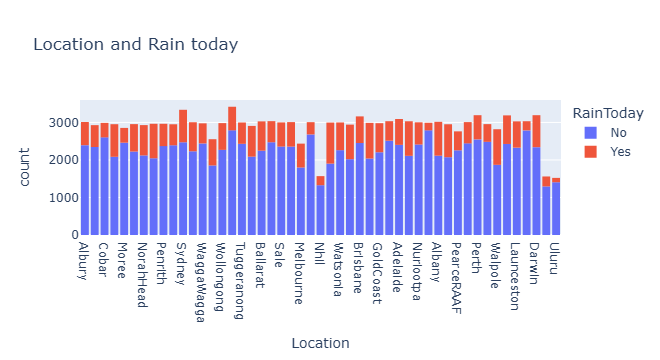

In [790]:
px.histogram(df,
             x='Location',
             color='RainToday',
             title="Location and Rain today"
             
            )

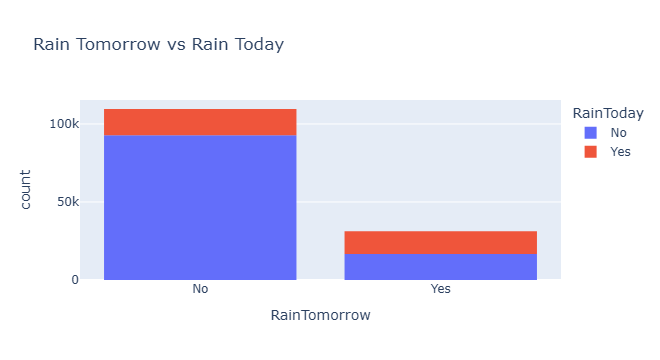

In [791]:
px.histogram(df,
             x='RainTomorrow',
             color='RainToday',
             title="Rain Tomorrow vs Rain Today"
            )

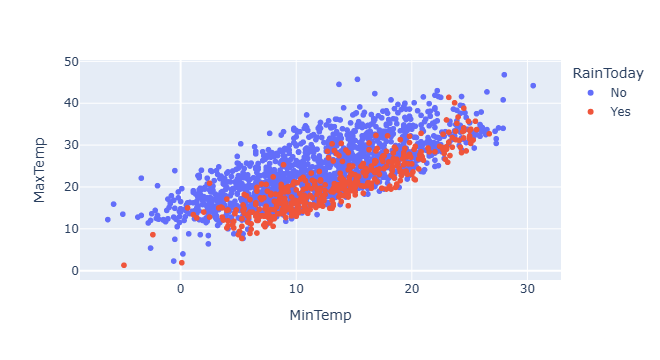

In [792]:
px.scatter(df.sample(2000), ## here we are using only the 2000 sample data
           x="MinTemp",
           y='MaxTemp',
           color='RainToday',
        )

# Train test split

In [794]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)


In [795]:
train_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
101492  2014-07-31  MountGambier     12.0     13.9       1.2          2.4   
116073  2013-03-23    PearceRAAF      9.7     27.9       0.0          NaN   
118641  2011-11-09  PerthAirport     10.5     21.8       1.6          5.2   
138836  2016-09-24  AliceSprings     19.8     24.9       0.0          NaN   
77431   2015-12-16      Portland     12.9     27.6       0.2          8.4   
...            ...           ...      ...      ...       ...          ...   
124349  2010-06-11    SalmonGums      NaN     16.5       NaN          NaN   
79732   2014-01-07      Watsonia     12.8     19.7       0.0          6.6   
98679   2015-03-15      Adelaide     16.2     24.8       0.0          NaN   
17063   2014-08-08     Newcastle      5.1     19.2       0.1          NaN   
108513  2017-04-29       Woomera     10.9     19.6       0.0          3.2   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
101492       0.1         WNW           85.0        NNW  ...        70.0   
116073      11.2         SSW           35.0          S  ...        59.0   
118641      10.6         WSW           37.0        NNE  ...        55.0   
138836       NaN         NNW           48.0        SSW  ...        34.0   
77431       13.4         ESE           31.0          E  ...        78.0   
...          ...         ...            ...        ...  ...         ...   
124349       NaN         NNE           26.0        ENE  ...        72.0   
79732        7.0           S           39.0          S  ...        52.0   
98679        NaN         ESE           28.0        ESE  ...        68.0   
17063        NaN         NaN            NaN        NaN  ...        96.0   
108513       NaN          SE           24.0         SE  ...        74.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
101492         57.0        994.4        998.1       7.0       8.0     13.9   
116073         38.0       1020.4       1017.1       NaN       NaN     19.3   
118641         39.0       1017.8       1017.3       3.0       4.0     18.3   
138836         52.0       1011.3       1009.0       8.0       2.0     21.1   
77431          55.0       1017.3       1015.2       NaN       NaN     18.3   
...             ...          ...          ...       ...       ...      ...   
124349         49.0          NaN          NaN       NaN       NaN     10.6   
79732          45.0       1023.9       1022.7       7.0       7.0     14.6   
98679          31.0       1017.7       1015.4       NaN       NaN     17.9   
17063          66.0          NaN          NaN       7.0       3.0      8.8   
108513         46.0       1027.2       1023.7       5.0       NaN     15.6   

        Temp3pm  RainToday  RainTomorrow  
101492      9.0        Yes           Yes  
116073     25.9         No            No  
118641     20.9        Yes            No  
138836     22.1         No            No  
77431      24.9         No            No  
...         ...        ...           ...  
124349     15.0        NaN            No  
79732      17.7         No            No  
98679      24.1         No            No  
17063      17.5         No            No  
108513     19.3         No            No  

[87276 rows x 23 columns]

In [796]:
val_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
34295   2011-02-15  SydneyAirport     18.6     25.5       0.6          6.6   
35343   2014-03-28  SydneyAirport     17.9     25.4       6.4          1.0   
82174   2012-04-21       Dartmoor     13.2     27.1       0.0          3.4   
136304  2009-07-22   AliceSprings     15.1     21.3       0.0          4.8   
37425   2011-07-16     WaggaWagga      2.2     15.5       0.0          2.2   
...            ...            ...      ...      ...       ...          ...   
5569    2016-03-03  BadgerysCreek     18.4     34.5       0.0          NaN   
92838   2016-04-10      GoldCoast     21.3     29.7       0.0          NaN   
130754  2011-01-03         Hobart      9.1     20.8       0.0         10.0   
92787   2016-02-19      GoldCoast     25.6     31.1       0.0          NaN   
108169  2016-05-20        Woomera     10.4     22.0       0.0          4.0   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
34295        3.0           E           35.0         SW  ...        86.0   
35343        0.0         WNW           24.0        WNW  ...        87.0   
82174        3.2          NW           54.0        ENE  ...       100.0   
136304       9.4         SSW           35.0         SW  ...        33.0   
37425        3.8         NaN            NaN        ESE  ...        66.0   
...          ...         ...            ...        ...  ...         ...   
5569         NaN           E           31.0         NE  ...        87.0   
92838        NaN         NNE           37.0         NW  ...        66.0   
130754      11.4         ESE           39.0        ESE  ...        48.0   
92787        NaN          NE           35.0        NNE  ...        85.0   
108169       4.7         NNE           30.0        ESE  ...        70.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
34295          52.0       1023.9       1022.3       7.0       6.0     20.9   
35343          63.0       1016.9       1013.4       7.0       8.0     19.1   
82174          39.0       1013.8       1009.1       NaN       NaN     15.3   
136304         23.0       1020.5       1017.4       3.0       2.0     17.4   
37425          55.0       1030.9       1026.3       5.0       7.0      6.8   
...             ...          ...          ...       ...       ...      ...   
5569           38.0       1021.3       1018.3       NaN       NaN     23.0   
92838          67.0       1020.7       1016.8       NaN       NaN     26.1   
130754         45.0       1016.6       1016.3       NaN       NaN     14.6   
92787          83.0       1013.7       1011.5       NaN       NaN     28.8   
108169         31.0       1023.1       1019.7       NaN       7.0     13.8   

        Temp3pm  RainToday  RainTomorrow  
34295      24.2         No            No  
35343      24.9        Yes           Yes  
82174      26.1         No           Yes  
136304     20.8         No            No  
37425      13.5         No            No  
...         ...        ...           ...  
5569       32.7         No            No  
92838      27.8         No            No  
130754     18.1         No            No  
92787      29.0         No           Yes  
108169     21.1         No            No  

[29092 rows x 23 columns]

In [797]:
test_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
100721  2012-04-22  MountGambier     15.0     18.9       4.2          6.6   
30234   2008-03-30        Sydney     13.1     26.8       0.0          4.6   
68427   2011-12-10     Melbourne     19.0     29.0       NaN         11.0   
28624   2013-03-27      Richmond     18.1     32.2       0.0          2.1   
31173   2010-10-25        Sydney     13.9     19.6      14.0          1.2   
...            ...           ...      ...      ...       ...          ...   
57136   2014-09-24      Ballarat     10.8     19.7       0.0          NaN   
30386   2008-08-29        Sydney      8.7     18.2       0.0          4.2   
17904   2016-11-26     Newcastle     14.5     25.2       0.0          NaN   
128313  2013-04-23       Walpole     12.7     20.6       0.8          NaN   
80574   2016-04-28      Watsonia     20.2     26.4       0.0          8.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
100721       8.0         NNW           54.0        NNW  ...        73.0   
30234       10.9         NaN            NaN          W  ...        61.0   
68427        5.6           N           59.0          N  ...        50.0   
28624        NaN          NE           30.0        NaN  ...        99.0   
31173        5.4         SSW           50.0         SW  ...        90.0   
...          ...         ...            ...        ...  ...         ...   
57136        NaN           N           43.0         NE  ...        56.0   
30386       10.1         NaN            NaN        WNW  ...        70.0   
17904        NaN         NaN            NaN         NW  ...        64.0   
128313       NaN         WNW           31.0        NNW  ...        92.0   
80574        0.0         NNE           39.0        NNE  ...        44.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
100721         64.0       1005.2       1003.7       4.0       5.0     17.3   
30234          22.0       1013.0       1009.0       0.0       1.0     16.9   
68427          38.0       1006.5       1003.4       NaN       NaN     24.2   
28624          51.0       1019.2       1014.6       NaN       NaN     20.9   
31173          64.0          NaN       1018.4       7.0       6.0     15.5   
...             ...          ...          ...       ...       ...      ...   
57136          68.0       1017.5       1013.7       5.0       8.0     16.3   
30386          62.0       1025.7       1022.3       2.0       4.0     12.5   
17904           NaN          NaN          NaN       4.0       NaN     22.5   
128313         83.0       1020.4       1020.4       NaN       NaN     15.9   
80574          37.0       1018.3       1016.6       7.0       7.0     21.8   

        Temp3pm  RainToday  RainTomorrow  
100721     17.6        Yes           Yes  
30234      25.9         No            No  
68427      27.2        NaN           NaN  
28624      31.6         No            No  
31173      19.1        Yes            No  
...         ...        ...           ...  
57136      17.2         No           Yes  
30386      16.1         No            No  
17904       NaN         No            No  
128313     19.2         No            No  
80574      25.2         No            No  

[29092 rows x 23 columns]

In [798]:
print("train_df",train_df.shape)
print("val_df",val_df.shape)
print("test_df",test_df.shape)

train_df (87276, 23)
val_df (29092, 23)
test_df (29092, 23)


### Now we split the data into train ,test and val col 

## Then we split the data based on the year <15 for train and == 15 for val and >15 for test bcoz we have the data till 2017 only 

In [801]:
df['Date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

In [802]:
df['Date']=pd.to_datetime(df['Date'])
# df['Year']=df['Date'].dt.year

In [803]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [804]:
year=df['Date'].dt.year
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [805]:
print("train_df",train_df.shape)
print("val_df",val_df.shape)
print("test_df",test_df.shape)

train_df (101018, 23)
val_df (17885, 23)
test_df (26557, 23)


In [806]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
144548 2014-12-27    Uluru     16.9     33.2       0.0          NaN       NaN   
144549 2014-12-28    Uluru     15.1     36.8       0.0          NaN       NaN   
144550 2014-12-29    Uluru     17.3     37.8       0.0          NaN       NaN   
144551 2014-12-30    Uluru     20.1     38.5       0.0          NaN       NaN   
144552 2014-12-31    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
144548         SSE           43.0        ESE  ...        22.0         13.0   
144549          NE           31.0        ENE  ...        16.0          8.0   
144550         ESE           39.0        ESE  ...        15.0          8.0   
144551         ESE           43.0        ESE  ...        22.0          9.0   
144552         WNW           76.0        ENE  ...        16.0          9.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
144548       1014.1       1009.8       NaN       NaN     23.7     31.8   
144549       1012.6       1007.6       NaN       NaN     28.9     34.8   
144550       1011.9       1008.0       NaN       NaN     29.7     35.7   
144551       1014.0       1009.2       NaN       NaN     29.8     37.2   
144552       1012.1       1006.2       NaN       NaN     30.1     37.4   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
144548         No            No  
144549         No            No  
144550         No            No  
144551         No            No  
144552         No            No  

[101018 rows x 23 columns]

In [807]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133   2015-01-01   Albury     11.4     33.5       0.0          NaN       NaN   
2134   2015-01-02   Albury     15.5     39.6       0.0          NaN       NaN   
2135   2015-01-03   Albury     17.1     38.3       0.0          NaN       NaN   
2136   2015-01-04   Albury     26.0     33.1       0.0          NaN       NaN   
2137   2015-01-05   Albury     19.0     35.2       0.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
144913 2015-12-27    Uluru     20.5     34.7       0.0          NaN       NaN   
144914 2015-12-28    Uluru     18.0     36.4       0.0          NaN       NaN   
144915 2015-12-29    Uluru     17.5     37.1       0.0          NaN       NaN   
144916 2015-12-30    Uluru     20.0     38.9       0.0          NaN       NaN   
144917 2015-12-31    Uluru     19.3     37.4       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2133           WSW           30.0        ESE  ...        45.0         14.0   
2134            NE           56.0        ESE  ...        45.0         12.0   
2135           NNE           48.0         NE  ...        35.0         19.0   
2136           NNE           41.0        ESE  ...        46.0         37.0   
2137             E           33.0        SSE  ...        60.0         34.0   
...            ...            ...        ...  ...         ...          ...   
144913           E           52.0        ESE  ...        23.0         12.0   
144914         ESE           54.0          E  ...        17.0          7.0   
144915           E           56.0          E  ...        12.0          7.0   
144916           E           59.0          E  ...        12.0         12.0   
144917          SE           56.0        ESE  ...        46.0         18.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2133         1013.5       1011.0       NaN       NaN     21.0     32.7   
2134         1016.0       1012.4       NaN       NaN     25.6     38.2   
2135         1017.9       1012.3       NaN       NaN     29.2     37.0   
2136         1013.6       1012.1       8.0       5.0     27.4     30.9   
2137         1017.4       1014.7       8.0       NaN     25.6     32.5   
...             ...          ...       ...       ...      ...      ...   
144913       1013.2       1010.1       NaN       NaN     24.3     33.0   
144914       1014.7       1010.9       NaN       NaN     26.7     35.0   
144915       1012.6       1007.5       NaN       NaN     28.1     34.7   
144916       1007.2       1002.6       NaN       1.0     31.3     38.4   
144917       1007.3       1003.7       NaN       NaN     25.8     35.8   

        RainToday  RainTomorrow  
2133           No            No  
2134           No            No  
2135           No            No  
2136           No            No  
2137           No            No  
...           ...           ...  
144913         No            No  
144914         No            No  
144915         No            No  
144916         No            No  
144917         No            No  

[17885 rows x 23 columns]

In [808]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498   2016-01-01   Albury     20.4     37.6       0.0          NaN       NaN   
2499   2016-01-02   Albury     20.9     33.6       0.4          NaN       NaN   
2500   2016-01-03   Albury     18.4     23.1       2.2          NaN       NaN   
2501   2016-01-04   Albury     17.3     23.7      15.6          NaN       NaN   
2502   2016-01-05   Albury     15.5     22.9       6.8          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
145456 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
145457 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
145458 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
145459 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
2498           ENE           54.0        NaN  ...        46.0         17.0   
2499           SSE           50.0        SSE  ...        54.0         30.0   
2500           ENE           48.0        ESE  ...        62.0         67.0   
2501           SSE           39.0         SE  ...        74.0         65.0   
2502           ENE           31.0         SE  ...        92.0         63.0   
...            ...            ...        ...  ...         ...          ...   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   
145459         NaN            NaN        ESE  ...        62.0         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
2498         1013.4       1009.2       7.0       3.0     26.1     36.7   
2499         1011.1       1008.4       8.0       8.0     24.8     31.7   
2500         1014.0       1014.8       8.0       8.0     21.8     19.5   
2501         1017.9       1016.5       8.0       8.0     19.2     21.6   
2502         1016.3       1013.9       8.0       8.0     17.2     22.2   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  
2498           No            No  
2499           No           Yes  
2500          Yes           Yes  
2501          Yes           Yes  
2502          Yes            No  
...           ...           ...  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  
145459         No           NaN  

[26557 rows x 23 columns]

## Identifying input and target columns 

### Here the column date  is not required and the last col rain tomorrow is the output we need to predict 

In [811]:
input_cols=list(df.columns)[1:-1]

In [812]:
target_col="RainTomorrow"
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [813]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()


In [814]:
val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()


In [815]:
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()


In [816]:
import numpy as np
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_col=train_inputs.select_dtypes('object').columns.tolist()

In [817]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [818]:
categorical_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [819]:
test_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury     20.4     37.6       0.0          NaN       NaN   
2499     Albury     20.9     33.6       0.4          NaN       NaN   
2500     Albury     18.4     23.1       2.2          NaN       NaN   
2501     Albury     17.3     23.7      15.6          NaN       NaN   
2502     Albury     15.5     22.9       6.8          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
2498           ENE           54.0        NaN        ESE  ...           7.0   
2499           SSE           50.0        SSE         SE  ...          17.0   
2500           ENE           48.0        ESE        ENE  ...          39.0   
2501           SSE           39.0         SE        SSE  ...          17.0   
2502           ENE           31.0         SE        SSE  ...           9.0   
...            ...            ...        ...        ...  ...           ...   
145455           E           31.0         SE        ENE  ...          11.0   
145456         NNW           22.0         SE          N  ...           9.0   
145457           N           37.0         SE        WNW  ...           9.0   
145458          SE           28.0        SSE          N  ...           7.0   
145459         NaN            NaN        ESE        ESE  ...          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2498           46.0         17.0       1013.4       1009.2       7.0   
2499           54.0         30.0       1011.1       1008.4       8.0   
2500           62.0         67.0       1014.0       1014.8       8.0   
2501           74.0         65.0       1017.9       1016.5       8.0   
2502           92.0         63.0       1016.3       1013.9       8.0   
...             ...          ...          ...          ...       ...   
145455         51.0         24.0       1024.6       1020.3       NaN   
145456         56.0         21.0       1023.5       1019.1       NaN   
145457         53.0         24.0       1021.0       1016.8       NaN   
145458         51.0         24.0       1019.4       1016.5       3.0   
145459         62.0         36.0       1020.2       1017.9       8.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
2498         3.0     26.1     36.7         No  
2499         8.0     24.8     31.7         No  
2500         8.0     21.8     19.5        Yes  
2501         8.0     19.2     21.6        Yes  
2502         8.0     17.2     22.2        Yes  
...          ...      ...      ...        ...  
145455       NaN     10.1     22.4         No  
145456       NaN     10.9     24.5         No  
145457       NaN     12.5     26.1         No  
145458       2.0     15.1     26.0         No  
145459       8.0     15.0     20.9         No  

[26557 rows x 21 columns]

In [820]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 101018, dtype: object

# Imputation Technique

In [822]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")


In [823]:
df[numerical_cols].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [824]:
imputer.fit(df[numerical_cols])

SimpleImputer()

In [825]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [826]:
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [827]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes: >

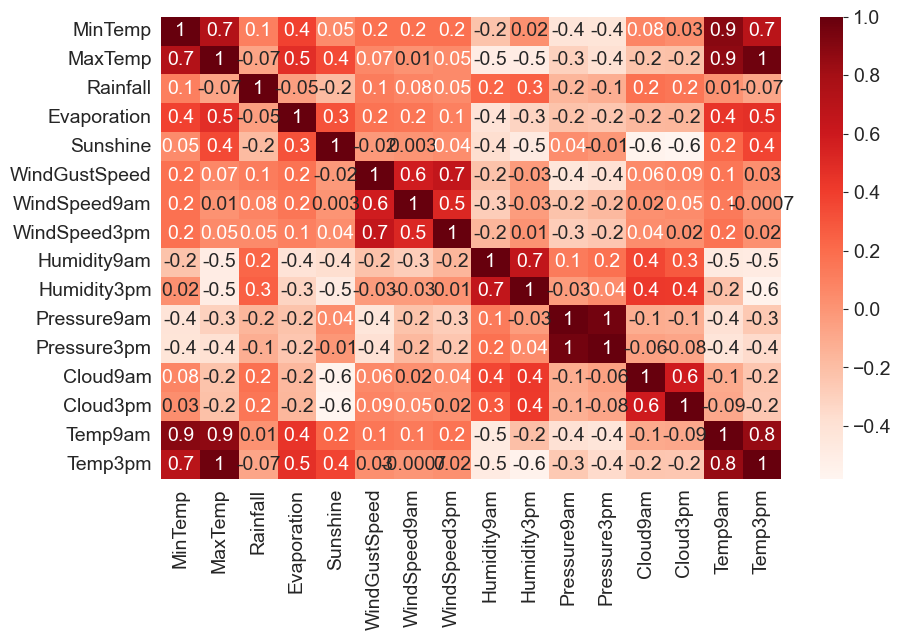

In [828]:
import seaborn as sns
sns.heatmap(train_inputs[numerical_cols].corr(),
            cmap='Reds',
            annot=True,
            fmt=".1g"
           )

In [829]:
# ?sns.heatmap

# To find the version of all the installed libraries

In [831]:
!pip list

Package                           Version
--------------------------------- ------------------
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio       

In [832]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [833]:
df[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [834]:
df[numerical_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

# Scaling Numerical Features

### Here we are going to use the MinMax Scaler 

In [837]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[numerical_cols])


MinMaxScaler()

In [838]:
df[numerical_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [839]:
train_inputs[numerical_cols].describe() ## before scaling

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean       11.993708      22.982556       2.381165       5.353008   
std         6.313387       6.975608       8.432540       3.108422   
min        -8.500000      -4.100000       0.000000       0.000000   
25%         7.500000      17.900000       0.000000       3.800000   
50%        11.800000      22.400000       0.000000       5.468232   
75%        16.500000      27.800000       1.000000       5.468232   
max        33.900000      48.100000     371.000000      82.400000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean        7.601115      40.248486      14.126682      18.776147   
std         2.897064      13.201832       8.943325       8.817635   
min         0.000000       6.000000       0.000000       0.000000   
25%         7.500000      31.000000       7.000000      13.000000   
50%         7.611178      39.000000      13.000000      19.000000   
75%         9.200000      46.000000      19.000000      24.000000   
max        14.300000     135.000000      87.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean       68.697168      51.552246    1017.533168    1015.154838   
std        18.831528      20.584602       6.723903       6.652154   
min         0.000000       0.000000     980.500000     979.000000   
25%        57.000000      37.000000    1013.400000    1011.000000   
50%        69.000000      52.000000    1017.649940    1015.255889   
75%        83.000000      65.000000    1021.700000    1019.300000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  101018.000000  101018.000000  101018.000000  101018.000000  
mean        4.364737       4.454915      16.814342      21.507842  
std         2.281705       2.125898       6.358405       6.799765  
min         0.000000       0.000000      -5.900000      -5.100000  
25%         3.000000       3.000000      12.200000      16.600000  
50%         4.447461       4.509930      16.600000      21.000000  
75%         6.000000       6.000000      21.200000      26.100000  
max         9.000000       9.000000      40.200000      46.100000

In [840]:
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

In [841]:
train_inputs[numerical_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean        0.483342       0.525190       0.006418       0.036917   
std         0.148901       0.131864       0.022729       0.021437   
min         0.000000       0.013233       0.000000       0.000000   
25%         0.377358       0.429112       0.000000       0.026207   
50%         0.478774       0.514178       0.000000       0.037712   
75%         0.589623       0.616257       0.002695       0.037712   
max         1.000000       1.000000       1.000000       0.568276   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean        0.524215       0.265492       0.108667       0.215818   
std         0.199797       0.102340       0.068795       0.101352   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.517241       0.193798       0.053846       0.149425   
50%         0.524909       0.255814       0.100000       0.218391   
75%         0.634483       0.310078       0.146154       0.275862   
max         0.986207       1.000000       0.669231       1.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  101018.000000  101018.000000  101018.000000  101018.000000   
mean        0.686972       0.515522       0.612118       0.608877   
std         0.188315       0.205846       0.111139       0.106434   
min         0.000000       0.000000       0.000000       0.030400   
25%         0.570000       0.370000       0.543802       0.542400   
50%         0.690000       0.520000       0.614049       0.610494   
75%         0.830000       0.650000       0.680992       0.675200   
max         1.000000       1.000000       1.000000       1.000000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  101018.000000  101018.000000  101018.000000  101018.000000  
mean        0.484971       0.494991       0.506632       0.516465  
std         0.253523       0.236211       0.134144       0.130514  
min         0.000000       0.000000       0.027426       0.005758  
25%         0.333333       0.333333       0.409283       0.422265  
50%         0.494162       0.501103       0.502110       0.506718  
75%         0.666667       0.666667       0.599156       0.604607  
max         1.000000       1.000000       1.000000       0.988484

## To find the min and max in each column

In [843]:
list(scaler.data_min_)

[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [844]:
list(scaler.data_max_)

[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [845]:
# ?OneHotEncoder

##  Then we need to encoded the categorical column using ONE HOT ENCODER

In [847]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df[categorical_col])


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [848]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [849]:
encoded_cols=list(encoder.get_feature_names_out(categorical_col))


In [850]:
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

### The encoder creates a separate column for each of unique values in the all categoricol column we need to copy it to the train,eva,test data

In [852]:
# train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_col])
# train_inputs[encoded_cols]

In [853]:
encoded_train_df=pd.DataFrame(
    encoder.transform(train_inputs[categorical_col]),
    columns=encoded_cols,
    index=train_inputs.index
)

In [854]:
encoded_val_df=pd.DataFrame(
    encoder.transform(val_inputs[categorical_col]),
    columns=encoded_cols,
    index=val_inputs.index
)

In [855]:
encoded_test_df=pd.DataFrame(
    encoder.transform(test_inputs[categorical_col]),
    columns=encoded_cols,
    index=test_inputs.index
)

In [856]:
# train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_col])
# val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_col])
# test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_col])

In [857]:
train_inputs=pd.concat([train_inputs.drop(columns=categorical_col),encoded_train_df],axis=1)
val_inputs=pd.concat([val_inputs.drop(columns=categorical_col),encoded_val_df],axis=1)
test_inputs=pd.concat([test_inputs.drop(columns=categorical_col),encoded_test_df],axis=1)

In [858]:
test_inputs.columns.nunique()

119

In [859]:
test_inputs.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [860]:
train_inputs

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037712  0.524909       0.294574   
1       0.375000  0.565217  0.000000     0.037712  0.524909       0.294574   
2       0.504717  0.576560  0.000000     0.037712  0.524909       0.310078   
3       0.417453  0.620038  0.000000     0.037712  0.524909       0.139535   
4       0.613208  0.701323  0.002695     0.037712  0.524909       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037712  0.524909       0.286822   
144549  0.556604  0.786389  0.000000     0.037712  0.524909       0.193798   
144550  0.608491  0.805293  0.000000     0.037712  0.524909       0.255814   
144551  0.674528  0.818526  0.000000     0.037712  0.524909       0.286822   
144552  0.731132  0.839319  0.000000     0.037712  0.524909       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
144548      0.184615      0.298851         0.22         0.13  ...   
144549      0.146154      0.229885         0.16         0.08  ...   
144550      0.200000      0.103448         0.15         0.08  ...   
144551      0.215385      0.195402         0.22         0.09  ...   
144552      0.230769      0.149425         0.16         0.09  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  RainToday_nan  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
...               ...            ...  
144548            0.0            0.0  
144549            0.0            0.0  
144550            0.0            0.0  
144551            0.0            0.0  
144552            0.0            0.0  

[101018 rows x 119 columns]

##  Saving Processed data to disk 
### Using the to_parquet from pyArrow library we store the perprocessed data it is more fast to retrive than csv

In [862]:
print('train_inputs',train_inputs.shape)
print('val_inputs',val_inputs.shape)
print('test_inputs',test_inputs.shape)
print('train_target',train_target.shape)
print('val_target',val_target.shape)
print('test_target',test_target.shape)


train_inputs (101018, 119)
val_inputs (17885, 119)
test_inputs (26557, 119)
train_target (101018,)
val_target (17885,)
test_target (26557,)


In [863]:
!pip install pyarrow --quiet

In [864]:
%%time
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

CPU times: total: 1.08 s
Wall time: 1.16 s


### The target are in the series object so we are converting here as data frame

In [866]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: total: 125 ms
Wall time: 112 ms


## Reading the parquet format file that is store in our local environment again after we referesh or reopen the note book instead of running it again

In [868]:
train_inputs=pd.read_parquet('train_inputs.parquet')
val_inputs=pd.read_parquet('val_inputs.parquet')
test_inputs=pd.read_parquet('test_inputs.parquet')

train_target=pd.read_parquet('train_target.parquet')[target_col]
val_target=pd.read_parquet('val_target.parquet')[target_col]
test_target=pd.read_parquet('test_target.parquet')[target_col]

### verifying the datas are working well

In [870]:
print('train_inputs',train_inputs.shape)
print('val_inputs',val_inputs.shape)
print('test_inputs',test_inputs.shape)
print('train_target',train_target.shape)
print('val_target',val_target.shape)
print('test_target',test_target.shape)


train_inputs (101018, 119)
val_inputs (17885, 119)
test_inputs (26557, 119)
train_target (101018,)
val_target (17885,)
test_target (26557,)


In [871]:
train_inputs.isna().sum()


MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_WSW    0
WindDir3pm_nan    0
RainToday_No      0
RainToday_Yes     0
RainToday_nan     0
Length: 119, dtype: int64

In [872]:
# train_target=train_target.dropna()
# val_target=val_target.dropna()
# test_target=test_target.dropna()

In [873]:
train_target.isna().sum()
test_target.isna().sum()
val_target.isna().sum()

654

In [874]:
train_target.nunique()

2

In [875]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_target_encoded=le.fit_transform(train_target.squeeze())
val_target_encoded=le.fit_transform(val_target.squeeze())
test_target_encoded=le.fit_transform(test_target.squeeze())


In [876]:
val_target_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [877]:
test_target_encoded

array([0, 1, 1, ..., 0, 0, 2])

In [878]:
train_target_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [879]:
print(f"train_input size: {train_inputs.shape}")
print(f"train_target size: {train_target.shape}")


train_input size: (101018, 119)
train_target size: (101018,)


# Training a Logistic Regression Model

In [881]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
model.fit(train_inputs[numerical_cols + encoded_cols],train_target_encoded)

LogisticRegression(solver='liblinear')

In [882]:
train_inputs[numerical_cols + encoded_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037712  0.524909       0.294574   
1       0.375000  0.565217  0.000000     0.037712  0.524909       0.294574   
2       0.504717  0.576560  0.000000     0.037712  0.524909       0.310078   
3       0.417453  0.620038  0.000000     0.037712  0.524909       0.139535   
4       0.613208  0.701323  0.002695     0.037712  0.524909       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037712  0.524909       0.286822   
144549  0.556604  0.786389  0.000000     0.037712  0.524909       0.193798   
144550  0.608491  0.805293  0.000000     0.037712  0.524909       0.255814   
144551  0.674528  0.818526  0.000000     0.037712  0.524909       0.286822   
144552  0.731132  0.839319  0.000000     0.037712  0.524909       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
144548      0.184615      0.298851         0.22         0.13  ...   
144549      0.146154      0.229885         0.16         0.08  ...   
144550      0.200000      0.103448         0.15         0.08  ...   
144551      0.215385      0.195402         0.22         0.09  ...   
144552      0.230769      0.149425         0.16         0.09  ...   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  RainToday_nan  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
...               ...            ...  
144548            0.0            0.0  
144549            0.0            0.0  
144550            0.0            0.0  
144551            0.0            0.0  
144552            0.0            0.0  

[101018 rows x 119 columns]

In [883]:
print(model.coef_.tolist())

[[-0.7831499083404471, 2.5710555152061945, -3.3361705573228453, -0.418777258159686, 1.5471410070569467, -6.532208774354466, 0.9868071413989324, 1.4584415810740223, -0.2542082669469913, -5.799584993792016, -5.082933605098103, 8.590572624416595, 0.09652045569835296, -1.2536642165673033, -0.09416137937463731, -2.1552217265411207, -0.747456054747307, 1.2960978491972286, -0.4470468518532568, 0.031051263298838668, -0.3723225127757716, 0.36669549174107025, -0.11413814498030023, -0.4216108181951403, -0.020174404386242267, 0.08233642358828829, -0.2007078038387152, 0.10719691429664496, -0.0009722192485434808, 0.4632443961335889, 0.13457704234227982, 0.5643272419339694, 0.7294881912530655, 0.26492095779704017, -0.19733562082085263, 0.5662199702858879, -0.030323576978287112, -0.2270394030308857, -0.033411431420838, 0.8012112835705877, 1.0856139216140803, 0.004564803061750115, 0.41199300553912716, 0.4329198031413609, 0.1016431711677912, -0.7195899143147624, -0.4356144748453813, -0.5592396564135226,

In [884]:
print(model.intercept_)

[ 2.07209618 -2.66139861 -3.27689433]


# Making predictions and Evaluating the Model

In [886]:
X_train=train_inputs[numerical_cols+encoded_cols]
X_val=val_inputs[numerical_cols+encoded_cols]
X_test=test_inputs[numerical_cols+encoded_cols]

In [887]:
train_predictions=model.predict(X_train)

In [888]:
train_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [889]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 101018, dtype: object

### probability prediction using predict proba

In [891]:
# train_preds=model.predict_proba(X_train)
# train_preds   ## here predict_proba will predict and give the probability so here we used predict
train_preds=model.predict(X_train)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [892]:
model.classes_

array([0, 1, 2])

In [893]:
from sklearn.metrics import accuracy_score

In [894]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 101018, dtype: object

In [903]:
accuracy_score(train_target_encoded,train_preds)

0.8376328971074462

In [910]:
from sklearn.metrics import confusion_matrix

In [918]:
confusion_matrix(train_target_encoded,train_preds,normalize="true")

array([[0.94362819, 0.05354279, 0.00282902],
       [0.47264731, 0.51281246, 0.01454023],
       [0.44482759, 0.15714286, 0.39802956]])

In [919]:
def predict_and_plot(inputs,target,name=''):
    preds=model.predict(inputs)
    accuracy=accuracy_score(target,preds)
    print(accuracy)

    cf=confusion_matrix(target,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix'.format(name))

    return preds

0.8376328971074462


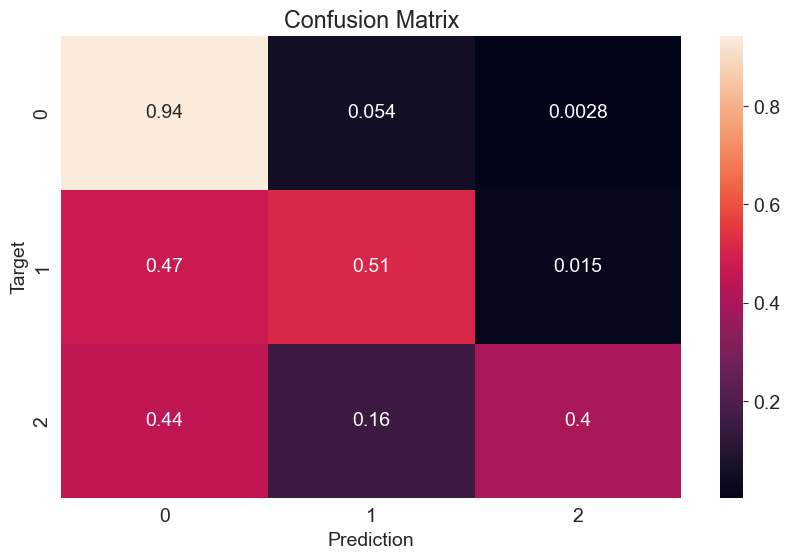

In [925]:
train_preds=predict_and_plot(X_train,train_target_encoded,'Training')

0.8452893486161588


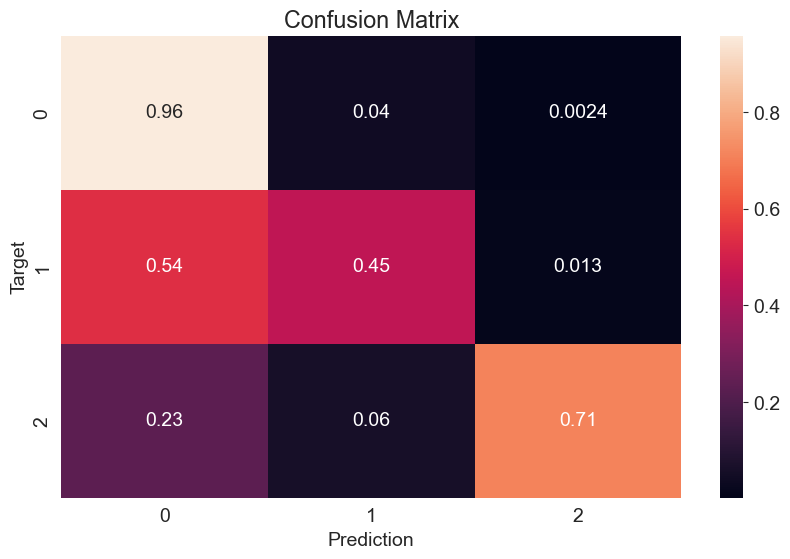

In [926]:
val_preds=predict_and_plot(X_val,val_target_encoded,'validating')

0.826637044846933


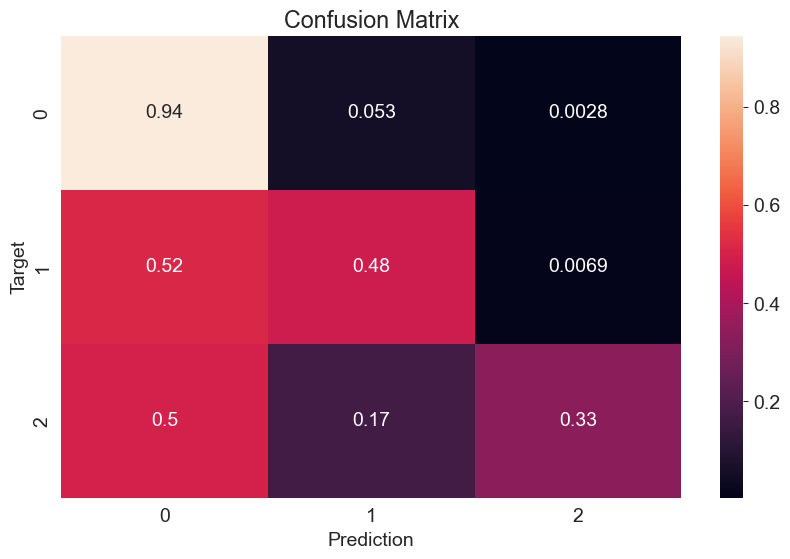

In [927]:
test_preds=predict_and_plot(X_test,test_target_encoded,'testing')

## Making a Model

In [939]:
def random_guess(inputs):
    return np.random.choice([0,1],len(inputs))


In [937]:
def all_no(inputs):
    return np.full(len(inputs),0)

In [943]:
accuracy_score(test_target_encoded,random_guess(X_test))

0.48427909778966

In [945]:
accuracy_score(test_target_encoded,all_no(X_test))

0.7541514478291976

In [948]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

# Making prediction on a Single input

In [962]:
new_input= {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [964]:
new_input_df=pd.DataFrame([new_input])

In [966]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           52.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

### Apply all the imputation , scaling and encoding to the input data

In [ ]:
encoded_train_df=pd.DataFrame(
    encoder.transform(train_inputs[categorical_col]),
    columns=encoded_cols,
    index=train_inputs.index
)

In [971]:
new_input_df[numerical_cols] = imputer.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
# new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_col])

In [979]:
encoded_new_input_df=pd.DataFrame(
    encoder.transform(new_input_df[categorical_col]),
    columns=encoded_cols,
    index=new_input_df.index 
)

In [1019]:
new_input_df[encoded_cols]=encoded_new_input_df

In [1008]:
new_input_df


Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.218105  0.104316  0.000074       0.0002  0.036201   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SSE  WindDir3pm_SSW  \
0         NNW      -0.043747         NW  ...            0.0             0.0   

   WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0            0.0           0.0             0.0             0.0   

   WindDir3pm_nan  RainToday_No  RainToday_Yes  RainToday_nan  
0             0.0           0.0            1.0            0.0  

[1 rows x 125 columns]

In [1033]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    # input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    encoded_input_df=pd.DataFrame(
    encoder.transform(input_df[categorical_col]),
    columns=encoded_cols,
    index=input_df.index 
    )
    input_df[encoded_cols]=encoded_input_df
    X_input = input_df[numerical_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [1035]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [1037]:
predict_input(new_input)

C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_69308\2886917409.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_69308\2886917409.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ANWAR RAJA\AppData\Local\Temp\ipykernel_69308\2886917409.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

(1, 0.6417480369667179)